In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021_paula/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
nltk=3.5 already installed
unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


<link rel="stylesheet" href="../../../common/dhds.css">
<div class="Table">
    <div class="Row">
        <div class="Cell grey left"> <img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_41_Pipelines/Presentacion/img/M5_CLASE_41_portada.jpg" align="center" width="70%"/></div>
        <div class="Cell right">
            <div class="div-logo"><img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/common/logo_DH.png" align="center" width=70% /></div>
            <div class="div-curso">DATA SCIENCE</div>
            <div class="div-modulo">MÓDULO 5</div>
            <div class="div-contenido">Pipeline

</div>
        </div>
    </div>
</div>

### Agenda

---

- ¿Qué son pipelines?
    
- Implementación

- GridSearch + Pipelines


<div class="div-dhds-fondo-1"> Pipeline
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Introducción

---

**Pipeline** (tubería) es una *serie de pasos automatizados* para transformar nuestros datos con el objetivo de asegurar su validez y consistencia.

**Cada paso se alimenta del paso previo**.

Al ser reutilizables aseguran la *consistencia* en la operación.

Al agrupar operaciones proveen un *mayor nivel de abstracción*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_41_Pipelines/Presentacion/img/M5_CLASE_41_001_pipeline.jpg" alt="pipeline" width=50% height=40% align="center"/>

### Introducción

---

Sabemos que una parte importante del trabajo de un DataScientist es *la preparación de los datos* previo a la aplicación de los *algoritmos de machine learning*. 

Para ello realizamos *distintas operaciones*: data cleaning, data wrangling, cambios de escala, selección de features, etc. 

Las podemos ver como un **encadenamiento de procesos**, que también pueden incluir *la aplicación y evaluación de los modelos*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_41_Pipelines/Presentacion/img/M5_CLASE_41_002_pipeline_ejemplo.png" alt="pipeline_ejemplo" width=80% height=60% />

### Pipeline en Scikit-learn

---

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipeline</a> es una clase de **scikit-learn** cuyo uso más común es facilitar el encadenamiento de pasos de preprocessing junto con un modelo.

`pipeline` es en sí un estimador que tiene los métodos `fit`, `predict` y `score`, igual que otros modelos, por ejemplo `LinearRegression`.

Todos los pasos encadenados en un `pipeline`, con excepción del último, tienen los métodos `fit` y `transform`, para generar una nueva representación del dato que se usa en el paso siguiente.

### Implementación de Pipeline

---
El esquema general para implementar `pipeline` es:

**1-** Construir la **lista de los pasos** que se ejecutan en secuencia. 
  
  Cada paso es una *tupla* que contiene un **nombre** (a elección) y la instancia de un **estimador**.  
  
  *Debemos previamente importar las librerías de los métodos que referenciamos*. En este ejemplo, un estimador para escalar los datos y otro para clasificar.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [3]:
pasos = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

---

**2-** Instanciar `pipeline` con los pasos definidos previamente.

In [4]:
pipe = Pipeline(pasos)

Usemos el dataset de vinos para ilustrar el proceso. Lo dividimos en train y test.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

%matplotlib inline

In [6]:
from sklearn.datasets import load_wine
X,y = load_wine(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
print('Total de filas: ',X.shape[0],'Total de columnas: ',X.shape[1])
X.head(2)

Total de filas:  178 Total de columnas:  13


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


---

**3-** Entrenamos la instancia de `pipeline` con los datos de entrenamiento, mediante el método `fit`.

   - Primero ejecuta para estos datos el *paso 'scaler'*: aplica `.fit` para aprender la media y desvío de la variable, y luego `.transform` para modificar la escala.
   
   - Los datos re-escalados son entrenados (`.fit`) con el modelo, en el paso 'knn'. Recordemos que **el último paso no tiene `.transform`**.

In [7]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

**4-** Evaluamos el modelo generado:

   - El método `predict` evalúa el modelo con los datos de test.
   
   - El método `score` devuelve *accuracy* del modelo. 
       
        Para ello, escala los datos de test  *X_test* con el método `transform` del paso *'scaler'*, y se los pasa a *'knn'*, que aplica el método `score`. 

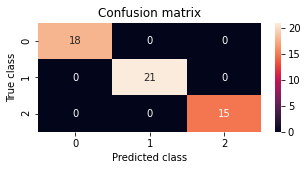

In [8]:
y_pred = pipe.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred); 
plt.figure(figsize=(5, 2)); sns.heatmap(conf_matrix,  annot=True, fmt="d");
plt.title("Confusion matrix"); plt.ylabel('True class'); plt.xlabel('Predicted class');plt.show()

In [9]:
pipe.score(X_test,y_test)

1.0

### Implementación de Pipeline

---
Resumimos lo anterior, asumiendo que **T1** y **T2** son dos pasos de preprocesamiento, y **Classifier** se refiere a un clasificador.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_41_Pipelines/Presentacion/img/M5_CLASE_41_003_pipeline_pasos.JPG" alt="pipeline_pasos" style="width: 600px;"/>

### make_pipeline

---
Si no queremos darle nombres específicos a los pasos, la clase `make_pipeline`, crea un Pipeline y nombra cada paso en forma automática.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

Usando Pipeline:

In [11]:
pasos = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipe = Pipeline(pasos)

Usando make_pipeline:

In [12]:
from sklearn.pipeline import make_pipeline
makepipe = make_pipeline(StandardScaler(),KNeighborsClassifier())

Para ver el nombre que le puso a cada paso o etapa, podemos usar `.steps`.

In [13]:
makepipe.steps

[('standardscaler', StandardScaler()),
 ('kneighborsclassifier', KNeighborsClassifier())]

### Atributos y parámetros

---
- Los **estimadores** se guardan como lista en el atributo `steps`.

In [14]:
pasos = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipe = Pipeline(pasos)

In [15]:
# Accedemos al scaler
pipe.steps[0]

('scaler', StandardScaler())

In [16]:
# Accedemos al clasificador
pipe.steps[1]

('knn', KNeighborsClassifier())

La misma información queda guardada en el atributo `named_steps`pero como un diccionario: 

In [17]:
pipe.named_steps['scaler']

StandardScaler()

- Los **parámetros** de los estimadores los podemos ver con el método `get_params`.

  Tienen el formato **nombre_paso__nombre_parámetro**.
  
  Y se pueden modificar con el método `set_params`.

In [18]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [19]:
pipe.set_params(knn__n_neighbors=4)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=4))])

<div class="div-dhds-fondo-1"> Pipeline + GridSearch
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Dataset

---
Vamos a trabajar con un archivo de semillas de trigo.

- Las features son propiedades geométricas de las semillas.

- *type_wheat* indica el tipo de semilla: 0 - Kama, 1 - Rosa y 2 - Canadian.

Para más detalles ver <a href="https://archive.ics.uci.edu/ml/datasets/seeds#">aquí</a>.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

%matplotlib inline

In [21]:
df = pd.read_csv('../Data/seeds_dataset.csv')
print('Total de filas: ',df.shape[0],'Total de columnas: ',df.shape[1])
df.sample(4)

Total de filas:  210 Total de columnas:  8


,area,perimeter,compactness,length,width,coefficient,length_groove,type_wheat
62,12.36,13.19,0.8923,5.076,3.042,3.220,4.605,1
54,14.52,14.60,0.8557,5.741,3.113,1.481,5.487,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
61,11.23,12.63,0.8840,4.902,2.879,2.269,4.703,1


Preparamos los archivos de train y test.

In [22]:
X = df.drop(['type_wheat'], axis=1)
y = df['type_wheat']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)

In [23]:
print('Totales por Tipo de semilla: \n ',pd.value_counts(df['type_wheat'], sort = True))

Totales por Tipo de semilla: 
  3    70
2    70
1    70
Name: type_wheat, dtype: int64


### GridSearch

---
Como vimos en una clase anterior, `GridSearch` busca *la mejor combinación de hiperparámetros* dentro de una **grilla (grid)** especificada previamente. La búsqueda es **exhaustiva para cada valor de la grilla**.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_41_Pipelines/Presentacion/img/M5_CLASE_41_004_gridsearch.JPG" alt="gridsearch" style="width: 250px;"/>

Para cada combinación de valores de los hiperparámetros: 

- los aplica sobre el *dataset de train* --> los *evalua con cross validation* --> *registra el score*.

Al final de todas las búsquedas:

- selecciona la combinación con **más alto score** --> aplica sobre **train** --> predice sobre **test**.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_grid_grid_random_2.png" alt="Drawing" style="width: 550px;"/>

### Pipeline + GridSearch

---
Podemos combinar los dos métodos:

- Generamos nuevamente la lista de pasos que le vamos a pasar a `pipeline` y lo instanciamos.

In [24]:
pasos = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipe_grid = Pipeline(pasos)

- Importamos `GridSearchCV` y una clase para definir los kfold del esquema de validación.

In [25]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold 

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

- La grilla de hiperparámetros debe identificar **el paso del pipeline y el hiperparámetro** y los valores a evaluar.

   Se indica con la sintaxis: *nombre_paso__nombre_hiperparámetro*.

In [26]:
param_grid = {'knn__n_neighbors':range(2,4,6),'knn__weights':['uniform','distance']}

- Se combinan ambos métodos instanciando `GridSearchCV` con 
  - la instancia de `pipeline`.
  - la grilla definida.
  - el método de cross validation.

y luego entrenamos el modelo.

In [27]:
grid = GridSearchCV(pipe_grid, param_grid, cv=folds)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(2, 4, 6),
                         'knn__weights': ['uniform', 'distance']})

---
Veamos el **score** del mejor modelo (`best_score_`), y los **pasos previos y su configuración** (`best_estimator_`).

In [28]:
print('Score: ',grid.best_score_)
grid.best_estimator_

Score:  0.9455172413793104


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=2))])

Y la performance con los datos de test.

In [29]:
accuracy_score(grid.best_estimator_.predict(X_test),y_test)

0.9047619047619048

### Pipeline + GridSearch + Preprocessing

---
Ademas de usar `GridSearch` para identificar la mejor configuración del modelo, se puede explorar cuál es la mejor configuración para los pasos previos.

Por ejemplo, evaluar si nos conviene usar para escalar `StandardScaler` o `MinMaxScaler`.

- Como antes, generamos nuevamente la lista de pasos que le vamos a pasar a `pipeline` y lo instanciamos. 

   **Solo** definimos como paso el uso de `StandardScaler`.  

In [30]:
pasos = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipe_grid_2 = Pipeline(pasos)

- Similarmente, importamos `GridSearchCV` y una clase para definir los kfold del esquema de validación.

In [31]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold 
folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

- La grilla de hiperparámetros ahora *incluye al paso 'scaler'* y sus valores a evaluar.

   - Nota: No se debe olvidar de importar los métodos a evaluar.
   - Nota 2: **None** significa no escalar. Lo agregamos como otra opción a evaluar.

In [32]:
from sklearn.preprocessing import MinMaxScaler
param_grid_2 = [{'scaler':[StandardScaler(), MinMaxScaler(),None], 
                   'knn__n_neighbors':range(2,4,6), 'knn__weights':['uniform','distance']}]                

- Combinamos `Pipeline` y `GridSearchCV`, y entrenamos el modelo.

In [33]:
grid_2 = GridSearchCV(pipe_grid_2, param_grid_2, cv=folds)
grid_2.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': range(2, 4, 6),
                          'knn__weights': ['uniform', 'distance'],
                          'scaler': [StandardScaler(), MinMaxScaler(), None]}])

---
Veamos el **score** del mejor modelo (`best_score_`), y los **pasos previos y su configuración** (`best_estimator_`). 

En este caso, no mejoraron los valores.

In [34]:
print('Score: ',grid_2.best_score_)
grid_2.best_estimator_

Score:  0.9455172413793104


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=2))])

Y la performance con los datos de test.

In [35]:
accuracy_score(grid_2.best_estimator_.predict(X_test),y_test)

0.9047619047619048

### Custom Data Transformers

---
Veamos dos temas que luego integraremos a `Pipeline`.


El package [`preprocessing`](https://scikit-learn.org/stable/modules/preprocessing.html) nos ofrece funciones y clases que transforman los datos para adecuarlos a nuestros modelos.

Pero a veces no es suficiente y necesitamos crear nuevas funciones o **Custom Data Transformers**.

Veamos dos maneras en que Scikit-learn nos permite crearlos, y usarlos **en forma estándar** como cualquier otra transformación.

---
Recordemos que nosotros aplicamos las transformaciones mediante los métodos de la clase  `.fit`, `.transform` y `.fit_transform`.

Por ejemplo, `StandardScaler`:

In [36]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaler = pd.DataFrame(scaler.transform(X_test))

- Una opción es usar la función `FunctionTransformer` de `preprocessing`.  Convierte una función Python **ya existente** en un transform.

  Por ejemplo, definimos un transform para calcular la media. Observemos que lo usamos como cualquier otro. 

In [37]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.mean)

df_mean = transformer.transform(df)
df_mean

area             14.847524
perimeter        14.559286
compactness       0.870999
length            5.628533
width             3.258605
coefficient       3.700201
length_groove     5.408071
type_wheat        2.000000
dtype: float64

### Custom Data Transformers

---
Otra forma de crear *Custom Data Transformers* es **heredar** los métodos de las clases de `scikit-learn` para tenerlos disponibles en nuestras propias clases.

Por un lado, [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html) permite heredar los métodos `get_params` y `set_params`.

Por otro lado, [`TransformerMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html) permite obtener los métodos `.fit`, `.transform` y `.fit_transform`.

---
Supongamos que hacemos un transformer que multiplica la entrada por un valor determinado.

Primero importamos las clases:

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

Definimos nuestra propia clase.

- Le pasamos las clases `BaseEstimator`y `TransformerMixin` para que herede los métodos de scikit-learn.

-  `___init___` es el constructor. Donde definimos los parámetros que recibimos.

- `fit` no es requerido. Solo transformamos.

- `transform` indica lo que haremos con los datos.

In [39]:
class FeatureMultiplier(BaseEstimator, TransformerMixin):
    
    def __init__(self,factor):
        self.factor = factor
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X * self.factor

Ahora generamos una instancia de la clase:

In [40]:
fm = FeatureMultiplier(2)

Y transformamos un dato:

In [41]:
test = np.diag((1,2,3))
test_t = fm.transform(test)

print('Dato Original'); print(test); print('Dato transformado'); print(test_t)

Dato Original
[[1 0 0]
 [0 2 0]
 [0 0 3]]
Dato transformado
[[2 0 0]
 [0 4 0]
 [0 0 6]]


### Feature Union

---
[`FeatureUnion`](https://scikit-learn.org/stable/modules/compose.html#featureunion-composite-feature-spaces) combina varios transformadores, y devuelve los outputs concatenados.

Es decir, aplica a los datos una serie de transformadores en forma paralela, y luego concatena la salida de ellos *en una única matriz*. 

Util para combinar *mecanismos de extracción de features* en un sólo transformador.

En este ejemplo `FeatureUnion` recibe tres transform para distintos tipos de features, concatena las salidas, y las entrega como un unico dataset al modelo.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_41_Pipelines/Presentacion/img/M5_CLASE_41_005_features_union.jpg" alt="features_union" width=80% height=60% />

### Pipeline - Resultado final

---
Ahora vamos a unir todos los conceptos para armar un proceso completo con `Pipeline`.

- Creamos dos `custom data transformers`. Uno selecciona un conjunto de features, el otro devuelve una feature discretizada.

- Generamos dos conjuntos de features usando `FeatureUnion` y los transformers.

- `GridSearch` ahora evalúa y selecciona una opción de cada grupo:
   - Los dos conjuntos de features.
   - Los métodos de preprocesamiento: StandardScaler(), MinMaxScaler(), None.
   - Los hiperparámetros `n_neighbors` y `weights`.

In [42]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold 

In [43]:
df.head(1)

,area,perimeter,compactness,length,width,coefficient,length_groove,type_wheat
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1


- Creamos los dos custom data transformers.

In [44]:
class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self,selected_features):
        self.selected_features=selected_features

    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]

In [45]:
class FeatureDiscretize(BaseEstimator, TransformerMixin):
    
    def __init__(self,selected_features):
        self.selected_features=selected_features
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return pd.DataFrame(pd.qcut(X[self.selected_features], 10, labels=False))

### Pipeline - Resultado final

---

- Creamos los dos conjuntos de features a evaluar usando `FeatureUnion` y los dos `Customer Transformers`.

In [46]:
# Primer FeatureUnion: selecciona 2 features y discretiza otro
union_1=FeatureUnion([('select',FeatureSelection(selected_features=['area','perimeter'])),
                    ('discret',FeatureDiscretize(selected_features='length_groove'))])

In [47]:
# Segundo FeatureUnion: selecciona 4 features y discretiza otro
union_2=FeatureUnion([('select',FeatureSelection(selected_features=['area','perimeter','length','width'])),
                    ('discret',FeatureDiscretize(selected_features='compactness'))])

- Ahora generamos como siempre la lista de pasos.

In [48]:
pasos= [('feature_engineering',union_1),
        ('preprocesamiento',StandardScaler()),
        ('clasificador',KNeighborsClassifier())]

pipe_grid_final=Pipeline(pasos)

- Definimos la grilla para el`GridSearch` y entrenamos el modelo en Train.

  En la etapa **feature_engineering** tenemos para evaluar los dos conjuntos de features transformadas.

In [49]:
param_grid_final = [{'feature_engineering':[union_1,union_2],
                   'preprocesamiento':[StandardScaler(), MinMaxScaler(), None],
                   'clasificador__n_neighbors':range(2,4,6), 'clasificador__weights':['uniform','distance']}]

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

grid_final=GridSearchCV(pipe_grid_final, param_grid_final, cv=folds)

grid_final.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        FeatureUnion(transformer_list=[('select',
                                                                        FeatureSelection(selected_features=['area',
                                                                                                            'perimeter'])),
                                                                       ('discret',
                                                                        FeatureDiscretize(selected_features='length_groove'))])),
                                       ('preprocesamiento', StandardScaler()),
                                       ('clasificador',
                                        KNeighb...
                                                                                  FeatureSelection(selected_features=['area',
              

---
Veamos el **score** del mejor modelo (`best_score_`), y los **pasos previos y su configuración** (`best_estimator_`).

El score bajó respecto a lo realizado anteriormente.

In [50]:
print('Score: ',grid_final.best_score_)
grid_final.best_estimator_

Score:  0.8841379310344827


Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('select',
                                                 FeatureSelection(selected_features=['area',
                                                                                     'perimeter'])),
                                                ('discret',
                                                 FeatureDiscretize(selected_features='length_groove'))])),
                ('preprocesamiento', None),
                ('clasificador',
                 KNeighborsClassifier(n_neighbors=2, weights='distance'))])

Y la performance con los datos de test.

In [51]:
accuracy_score(grid_final.best_estimator_.predict(X_test),y_test)

0.9047619047619048

<div class="div-dhds-fondo-1"> Conclusiones
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_separador.png" align="center" />

</div>

## Conclusiones

---
Usar `pipeline` tiene algunas ventajas: 

- Facilita la creación de un flujo de trabajo coherente y fácil de entender.

- Reproducibilidad.

- Combinación con `GridSearch` para la selección de los hiperparámetros.

- Combinación con `Custom Data Transformers` y `FeatureUnion` para persistir la transformación y selección de las features en el mismo proceso.


<div class="div-dhds-fondo-1"> Hands-on
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Ejercicio

----

A partir del dataset de semillas de trigo, vamos a usar `Pipeline` para crear un flujo de trabajo.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

%matplotlib inline

In [53]:
df = pd.read_csv('../Data/seeds_dataset.csv')
print('Total de filas: ',df.shape[0],'Total de columnas: ',df.shape[1])
df.sample(2)

Total de filas:  210 Total de columnas:  8


,area,perimeter,compactness,length,width,coefficient,length_groove,type_wheat
61,11.23,12.63,0.8840,4.902,2.879,2.269,4.703,1
133,16.16,15.33,0.8644,5.845,3.395,4.266,5.795,2


Preparamos los archivos de train y test.

In [54]:
X = df.drop(['type_wheat'], axis=1)
y = df['type_wheat']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)

Vamos a usar nuevamente las dos `Custom Data Transformers`:

In [55]:
class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self,selected_features):
        self.selected_features=selected_features

    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]

In [56]:
class FeatureDiscretize(BaseEstimator, TransformerMixin):
    
    def __init__(self,selected_features):
        self.selected_features=selected_features
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return pd.DataFrame(pd.qcut(X[self.selected_features], 10, labels=False))

### Ejercicio

----

Generamos un conjunto de features usando:
- `FeatureSelection` para seleccionar 'area','length','width','coefficient'.
- `FeatureDiscretize` para discretizar 'perimeter'.

In [57]:
# union=FeatureUnion([('select',...),
#                    ('discret',...)])

- Generamos la lista de pasos y la instancia para `Pipeline`:
  - 'feature_engineering' para el conjunto de features.
  - 'preprocesamiento' para `StandardScaler()`.
  - 'clasificador' para `KNeighborsClassifier()`.

In [58]:
# pasos= [('feature_engineering',...),
#        ('preprocesamiento',...),
#        ('clasificador',...)]

# pipe_grid_handson=Pipeline(pasos)

- Definimos la grilla para el`GridSearch` y entrenamos el modelo en Train.

  - No incluimos la etapa 'feature_engineering' para evaluar, pues tenemos un conjunto de features.
  - Para la etapa 'preprocesamiento' comparamos `StandardScaler()` y `StandardScaler()`
  - Para la etapa 'clasificador' evaluamos los hiperparámetros `n_neighbors` y `weights`, con los valores (2,4,6) y ('uniform','distance') respectivamente.

In [59]:
# param_grid_handson = [{'preprocesamiento':[...],
#                   'clasificador__...), 'clasificador__...}]

# folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

# grid_handson=GridSearchCV(..., ..., cv=folds)

# grid_handson.fit(X_train,y_train)

---
Veamos el **score** del mejor modelo (`best_score_`), y los **pasos previos y su configuración** (`best_estimator_`).

Y la performance con los datos de test.

In [60]:
# accuracy_score(grid_handson.best_estimator_.predict(X_test),y_test)

### Solución

---

### Ejercicio

----

A partir del dataset de semillas de trigo, vamos a usar `Pipeline` para crear un flujo de trabajo.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

%matplotlib inline

In [62]:
df = pd.read_csv('../Data/seeds_dataset.csv')
print('Total de filas: ',df.shape[0],'Total de columnas: ',df.shape[1])
df.sample(2)

Total de filas:  210 Total de columnas:  8


,area,perimeter,compactness,length,width,coefficient,length_groove,type_wheat
93,18.59,16.05,0.9066,6.037,3.860,6.001,5.877,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1


Preparamos los archivos de train y test.

In [63]:
X = df.drop(['type_wheat'], axis=1)
y = df['type_wheat']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)

Vamos a usar nuevamente las dos `Custom Data Transformers`:

In [64]:
class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self,selected_features):
        self.selected_features=selected_features

    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]

In [65]:
class FeatureDiscretize(BaseEstimator, TransformerMixin):
    
    def __init__(self,selected_features):
        self.selected_features=selected_features
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return pd.DataFrame(pd.qcut(X[self.selected_features], 10, labels=False))

### Ejercicio

----

Generamos un conjunto de features usando:
- `FeatureSelection` para seleccionar 'area','length','width','coefficient'.
- `FeatureDiscretize` para discretizar 'perimeter'.

In [66]:
union=FeatureUnion([('select',FeatureSelection(selected_features=['area','length','width','coefficient'])),
                    ('discret',FeatureDiscretize(selected_features='perimeter'))])

- Generamos la lista de pasos y la instancia para `Pipeline`:
  - 'feature_engineering' para el conjunto de features.
  - 'preprocesamiento' para `StandardScaler()`.
  - 'clasificador' para `KNeighborsClassifier()`.

In [67]:
pasos= [('feature_engineering',union),
        ('preprocesamiento',StandardScaler()),
        ('clasificador',KNeighborsClassifier())]

pipe_grid_handson=Pipeline(pasos)

- Definimos la grilla para el`GridSearch` y entrenamos el modelo en Train.

  - No incluimos la etapa 'feature_engineering' para evaluar, pues tenemos un conjunto de features.
  - Para la etapa 'preprocesamiento' comparamos `StandardScaler()` y `StandardScaler()`
  - Para la etapa 'clasificador' evaluamos los hiperparámetros `n_neighbors` y `weights`, con los valores (2,4,6) y ('uniform','distance') respectivamente.

In [68]:
param_grid_handson = [{'preprocesamiento':[StandardScaler(), MinMaxScaler()],
                   'clasificador__n_neighbors':range(2,4,6), 'clasificador__weights':['uniform','distance']}]

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

grid_handson=GridSearchCV(pipe_grid_handson, param_grid_handson, cv=folds)

grid_handson.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        FeatureUnion(transformer_list=[('select',
                                                                        FeatureSelection(selected_features=['area',
                                                                                                            'length',
                                                                                                            'width',
                                                                                                            'coefficient'])),
                                                                       ('discret',
                                                                        FeatureDiscretize(selected_features='perimeter'))])),
                                       ('preprocesamiento', StandardScaler()),
              

---
Veamos el **score** del mejor modelo (`best_score_`), y los **pasos previos y su configuración** (`best_estimator_`).

In [69]:
print('Score: ',grid_handson.best_score_)
grid_handson.best_estimator_

Score:  0.8977011494252872


Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('select',
                                                 FeatureSelection(selected_features=['area',
                                                                                     'length',
                                                                                     'width',
                                                                                     'coefficient'])),
                                                ('discret',
                                                 FeatureDiscretize(selected_features='perimeter'))])),
                ('preprocesamiento', MinMaxScaler()),
                ('clasificador',
                 KNeighborsClassifier(n_neighbors=2, weights='distance'))])

Y la performance con los datos de test.

In [70]:
accuracy_score(grid_handson.best_estimator_.predict(X_test),y_test)

0.873015873015873

<div class="div-dhds-fondo-1"> Referencias y Material Adicional
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Referencias y Material Adicional

---

<a href="https://scikit-learn.org/stable/data_transforms.html" target="_blank">Data Transform - Scikit-learn</a>

<a href="https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-ef792bbb3260" target="_blank">Pipelines & Custom Transformers in Scikit-learn</a>

<a href="https://medium.com/analytics-vidhya/scikit-learn-pipelines-with-custom-transformer-a-step-by-step-guide-9b9b886fd2cc" target="_blank">Scikit-Learn Pipelines with Custom Transformer — A Step by Step Guide.</a>
